# COMP4096 Business Intelligence Group Project
## COVID-19 Data Analysis and Prediction (United Kingdom Data)

#### This part is written by Wong Tin Yau David (18207871).

##### Datasets below are downloaded from https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv, which is provided by https://ourworldindata.org/. (An Open Source Project). With Filtering (only select data after 2021 because vaccines releases in this year and we would like to see the effectiveness)


### 1. Import Data 'owid-covid-data_2021.csv'

In [ ]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'
df = pd.read_csv('https://raw.githubusercontent.com/dtywong/covid19-data-analysis/main/owid-covid-data_2021.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,1/1/2021,"51,526.0000",0.0000,102.2860,"2,191.0000",0.0000,7.4290,"1,323.6120",0.0000,2.6280,56.2830,0.0000,0.1910,0.5600,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,12.0400,"38,928,341.0000",54.4220,18.6000,2.5810,1.3370,"1,803.9870",nan,597.0290,9.5900,nan,nan,37.7460,0.5000,64.8300,0.5110
1,AFG,Asia,Afghanistan,2/1/2021,"51,526.0000",0.0000,91.4290,"2,191.0000",0.0000,6.0000,"1,323.6120",0.0000,2.3490,56.2830,0.0000,0.1540,0.5400,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,12.0400,"38,928,341.0000",54.4220,18.6000,2.5810,1.3370,"1,803.9870",nan,597.0290,9.5900,nan,nan,37.7460,0.5000,64.8300,0.5110
2,AFG,Asia,Afghanistan,3/1/2021,"51,526.0000",0.0000,69.5710,"2,191.0000",0.0000,4.4290,"1,323.6120",0.0000,1.7870,56.2830,0.0000,0.1140,0.5200,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,12.0400,"38,928,341.0000",54.4220,18.6000,2.5810,1.3370,"1,803.9870",nan,597.0290,9.5900,nan,nan,37.7460,0.5000,64.8300,0.5110
3,AFG,Asia,Afghanistan,4/1/2021,"53,011.0000","1,485.0000",247.2860,"2,237.0000",46.0000,9.0000,"1,361.7590",38.1470,6.3520,57.4650,1.1820,0.2310,0.5100,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,12.0400,"38,928,341.0000",54.4220,18.6000,2.5810,1.3370,"1,803.9870",nan,597.0290,9.5900,nan,nan,37.7460,0.5000,64.8300,0.5110
4,AFG,Asia,Afghanistan,5/1/2021,"53,105.0000",94.0000,250.7140,"2,244.0000",7.0000,9.2860,"1,364.1730",2.4150,6.4400,57.6440,0.1800,0.2390,0.5100,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,12.0400,"38,928,341.0000",54.4220,18.6000,2.5810,1.3370,"1,803.9870",nan,597.0290,9.5900,nan,nan,37.7460,0.5000,64.8300,0.5110


In [ ]:
df.shape

(23648, 59)

### 2. Select the data only from G20 Countries only

In [ ]:
ukdf = df[(df["location"]=='United Kingdom')]
ukdf.shape

(112, 59)

In [ ]:
droppable_features = []

### 3. Seach columns with mostly-missing values and drop columns with over 99% missing values

In [ ]:
(ukdf.isnull().sum()/ukdf.shape[0]).sort_values(ascending=False)

weekly_icu_admissions                   1.0000
handwashing_facilities                  1.0000
weekly_icu_admissions_per_million       1.0000
weekly_hosp_admissions                  0.8571
weekly_hosp_admissions_per_million      0.8571
new_vaccinations                        0.0982
total_vaccinations_per_hundred          0.0804
total_vaccinations                      0.0804
people_vaccinated                       0.0804
people_fully_vaccinated                 0.0804
people_fully_vaccinated_per_hundred     0.0804
people_vaccinated_per_hundred           0.0804
stringency_index                        0.0625
new_vaccinations_smoothed               0.0357
new_vaccinations_smoothed_per_million   0.0357
hosp_patients_per_million               0.0268
hosp_patients                           0.0268
icu_patients_per_million                0.0179
icu_patients                            0.0179
reproduction_rate                       0.0179
total_tests_per_thousand                0.0089
positive_rate

In [ ]:
droppable_features.append('weekly_icu_admissions')
droppable_features.append('handwashing_facilities')
droppable_features.append('weekly_icu_admissions_per_million')


### 4. Selected skewed (Skewness > 50) columns and drop columns with over 99% values.

In [ ]:
droppable_features.append('iso_code')
droppable_features.append('continent')
droppable_features.append('life_expectancy')
droppable_features.append('hospital_beds_per_thousand')
droppable_features.append('male_smokers')
droppable_features.append('female_smokers')
droppable_features.append('diabetes_prevalence')
droppable_features.append('cardiovasc_death_rate')
droppable_features.append('extreme_poverty')
droppable_features.append('gdp_per_capita')
droppable_features.append('aged_70_older')
droppable_features.append('aged_65_older')
droppable_features.append('median_age')
droppable_features.append('population_density')
droppable_features.append('population')
droppable_features.append('tests_units')
droppable_features.append('human_development_index')
droppable_features.append('location')
droppable_features.append('weekly_hosp_admissions')
droppable_features.append('weekly_hosp_admissions_per_million')
droppable_features.append('stringency_index')

In [ ]:
#pd.options.display.float_format = '{:,.4f}'.format
#sk_df = pd.DataFrame([{'column': c, 'uniq': ukdf[c].nunique(), 'skewness': ukdf[c].value_counts(normalize=True).values[0] * 100} for c in ukdf.columns])
#sk_df = sk_df.sort_values('skewness', ascending=False)
#sk_df

In [ ]:
#droppable_features.extend(sk_df[sk_df.skewness > 99].column.tolist())


In [ ]:
droppable_features

['weekly_icu_admissions',
 'handwashing_facilities',
 'weekly_icu_admissions_per_million',
 'iso_code',
 'continent',
 'life_expectancy',
 'hospital_beds_per_thousand',
 'male_smokers',
 'female_smokers',
 'diabetes_prevalence',
 'cardiovasc_death_rate',
 'extreme_poverty',
 'gdp_per_capita',
 'aged_70_older',
 'aged_65_older',
 'median_age',
 'population_density',
 'population',
 'tests_units',
 'human_development_index',
 'location',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'stringency_index']

In [ ]:
ukdf.drop(droppable_features, axis=1, inplace=True)
ukdf.shape

(112, 35)

### 5. Find columns that have more than 10% of missing values and filled with means or 0.



In [ ]:
null_counts = ukdf.isnull().sum()
null_counts = null_counts / ukdf.shape[0]
null_counts[null_counts > 0.1]

Series([], dtype: float64)

### 6. Find correlations between each attributes

In [ ]:
cols = ukdf.columns.tolist()

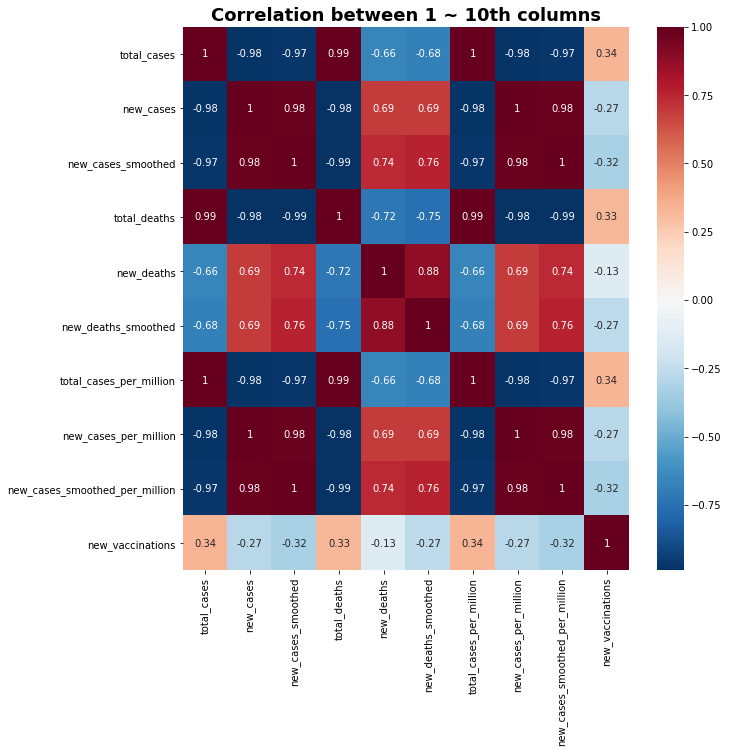

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
co_cols = cols[:10]
co_cols.append('new_vaccinations')
sns.heatmap(ukdf[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('Correlation between 1 ~ 10th columns', weight ='bold', fontsize = 18)
plt.show()

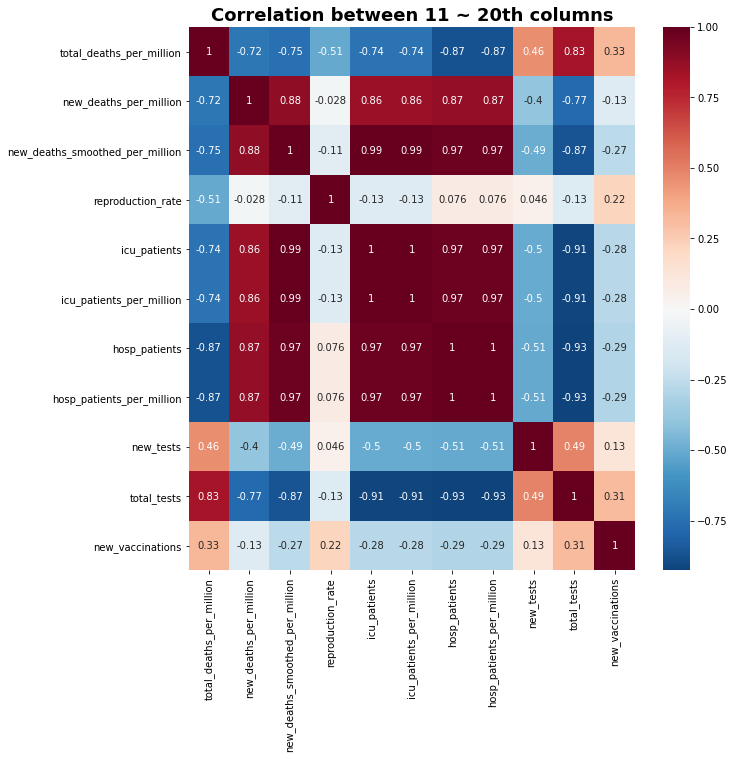

In [ ]:
corr_remove = []
co_cols = cols[10:20]
co_cols.append('new_vaccinations')
plt.figure(figsize=(10,10))
sns.heatmap(ukdf[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('Correlation between 11 ~ 20th columns', weight ='bold', fontsize = 18)
plt.show()

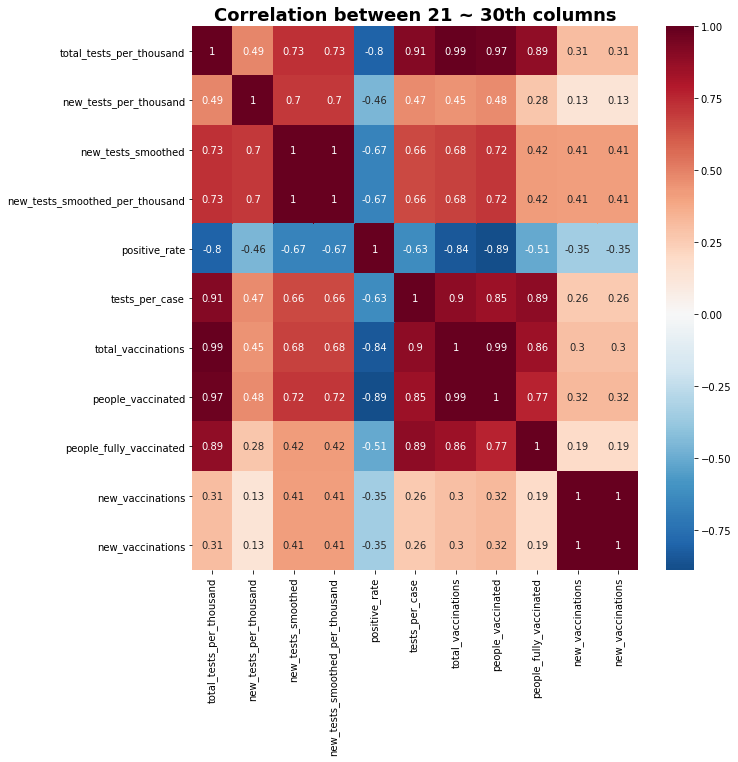

In [ ]:
corr_remove = []
co_cols = cols[20:30]
co_cols.append('new_vaccinations')
plt.figure(figsize=(10,10))
sns.heatmap(ukdf[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('Correlation between 21 ~ 30th columns', weight ='bold', fontsize = 18)
plt.show()

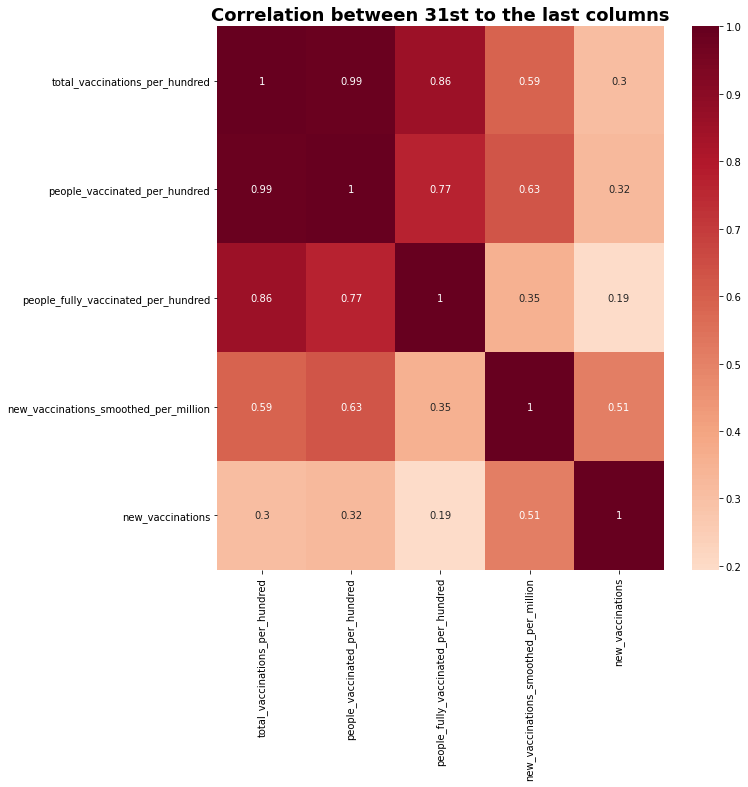

In [ ]:
corr_remove = []
co_cols = cols[31:]
co_cols.append('new_vaccinations')
plt.figure(figsize=(10,10))
sns.heatmap(ukdf[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('Correlation between 31st to the last columns', weight ='bold', fontsize = 18)
plt.show()

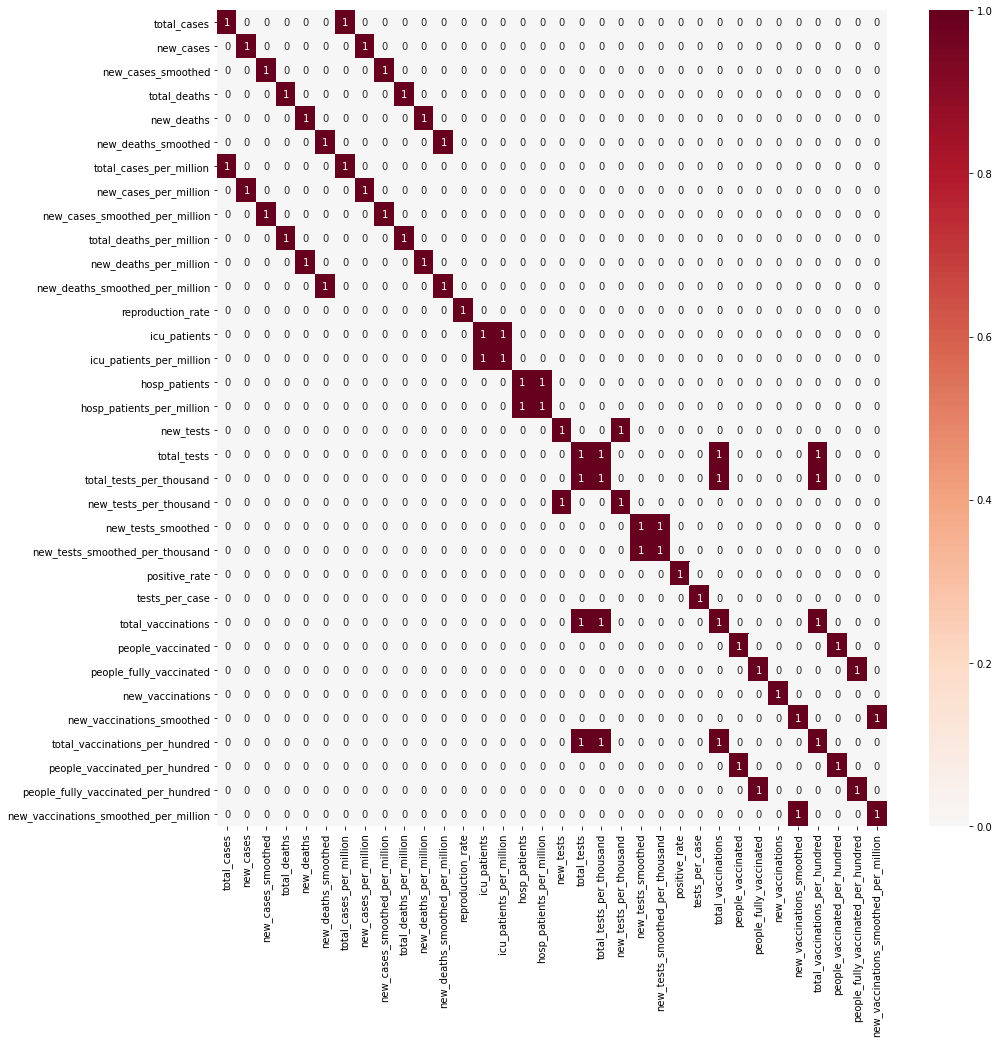

In [ ]:
corr = ukdf.corr()
high_corr = (corr >= 0.99).astype('uint8')
plt.figure(figsize=(15,15))
sns.heatmap(high_corr, cmap='RdBu_r', annot=True, center=0.0)
plt.show()

### 7. Plot the line graph to see the trend (Cases versus Vaccinations).


In [ ]:
ukdf2 = ukdf[(ukdf["date"]=='31/1/2021')|(ukdf["date"]=='28/2/2021')|(ukdf["date"]=='31/3/2021')]

In [ ]:
ukdf2.head()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million
22334,31/1/2021,"3,828,187.0000","21,190.0000","24,332.2860","106,367.0000",590.0000,"1,176.8570","56,391.4030",312.1410,358.4290,"1,566.8470",8.6910,17.3360,0.7200,"3,687.0000",54.3120,"32,586.0000",480.0110,"574,012.0000","70,340,312.0000","1,036.1530",8.4560,"639,858.0000",9.4250,0.0380,26.3000,"9,790,576.0000","9,296,367.0000","494,209.0000","322,194.0000","392,361.0000",14.4200,13.6900,0.7300,"5,780.0000"
22362,28/2/2021,"4,188,827.0000","6,055.0000","8,749.8570","123,083.0000",144.0000,324.7140,"61,703.8380",89.1940,128.8900,"1,813.0840",2.1210,4.7830,0.6900,"1,783.0000",26.2650,"12,789.0000",188.3890,"526,679.0000","87,496,888.0000","1,288.8800",7.7580,"633,301.0000",9.3290,0.0140,72.4000,"21,091,267.0000","20,275,451.0000","815,816.0000","205,584.0000","391,872.0000",31.0700,29.8700,1.2000,"5,773.0000"
22393,31/3/2021,"4,359,982.0000","4,115.0000","4,762.4290","126,955.0000",43.0000,47.7140,"64,225.0500",60.6160,70.1530,"1,870.1200",0.6330,0.7030,0.7900,547.0000,8.0580,"3,741.0000",55.1070,"1,266,685.0000","124,147,198.0000","1,828.7600",18.6590,"1,063,178.0000",15.6610,0.0040,223.2000,"35,660,902.0000","31,147,444.0000","4,513,458.0000","627,008.0000","556,319.0000",52.5300,45.8800,6.6500,"8,195.0000"


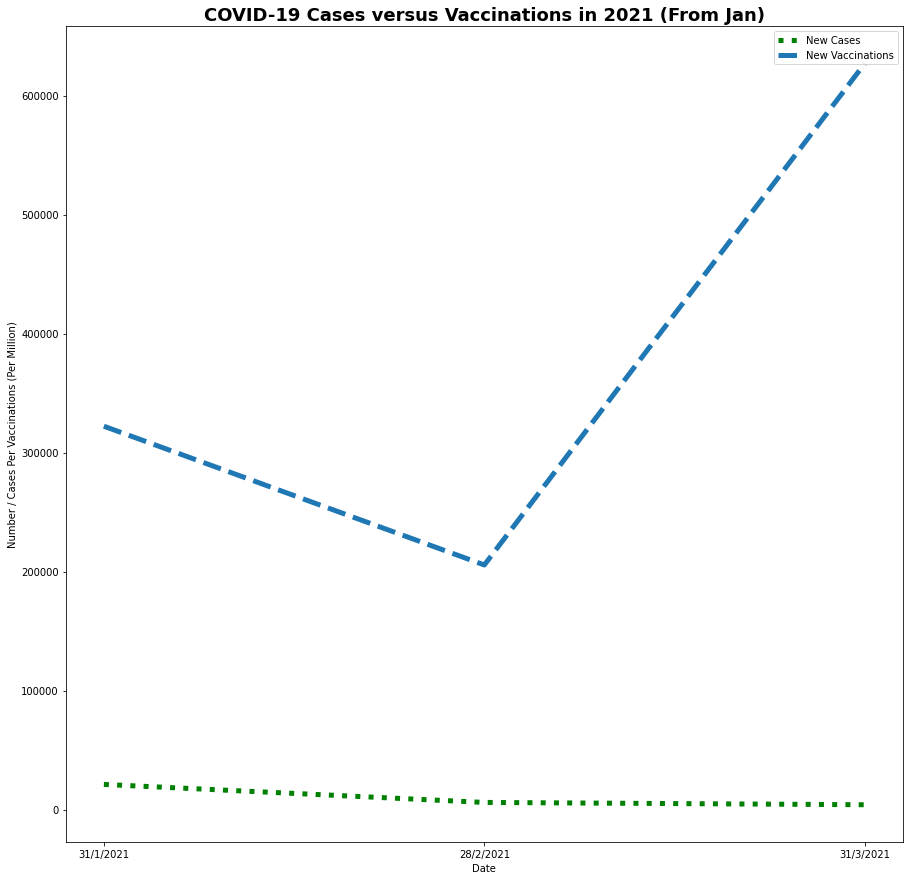

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
ax.plot(ukdf2['date'],ukdf2['new_cases'],color='green', linestyle=':', label='New Cases',linewidth = 5)
ax.plot(ukdf2['date'],ukdf2['new_vaccinations'], linestyle='--', label = 'New Vaccinations',linewidth = 5)

ax.legend(loc=1) #

ax.set_title('COVID-19 Cases versus Vaccinations in 2021 (From Jan)', fontweight='bold',fontsize=18) 


ax.set_xlabel('Date')
ax.set_ylabel('Number / Cases Per Vaccinations (Per Million)');

In [ ]:
ukdf.describe()


,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million
count,112.0000,112.0000,112.0000,112.0000,112.0000,112.0000,112.0000,112.0000,112.0000,112.0000,112.0000,112.0000,110.0000,110.0000,110.0000,109.0000,109.0000,111.0000,111.0000,111.0000,111.0000,111.0000,111.0000,111.0000,111.0000,103.0000,103.0000,103.0000,101.0000,108.0000,103.0000,103.0000,103.0000,108.0000
mean,"3,970,296.2232","17,121.4196","18,359.4094","113,658.6786",481.9196,499.8813,"58,484.7537",252.2084,270.4447,"1,674.2579",7.0990,7.3636,0.8396,"2,054.0364",30.2571,"18,057.1193",265.9918,"779,881.4775","92,063,855.9550","1,356.1537",11.4881,"803,008.6486",11.8288,0.0317,143.9198,"22,080,086.9612","19,618,241.5437","2,461,845.4175","413,586.9406","390,667.5278",32.5257,28.8984,3.6261,"5,754.7778"
std,"485,228.0347","18,113.0076","18,400.8146","16,862.1369",503.1681,439.3765,"7,147.6889",266.8150,271.0546,248.3890,7.4120,6.4722,0.1474,"1,322.9372",19.4877,"13,271.4396",195.4960,"361,094.6727","27,329,030.3651",402.5723,5.3191,"284,369.3612",4.1889,0.0373,153.3357,"12,590,333.8849","10,170,586.1684","2,962,636.4903","146,088.8990","105,226.2752",18.5465,14.9822,4.3643,"1,550.1156"
min,"2,549,693.0000","-4,787.0000","1,544.5710","74,237.0000",6.0000,22.7140,"37,558.4490",-70.5150,22.7520,"1,093.5540",0.0880,0.3350,0.6800,300.0000,4.4190,"1,977.0000",29.1220,"383,946.0000","52,983,845.0000",780.4830,5.6560,"392,088.0000",5.7760,0.0020,7.8000,"1,402,432.0000","1,380,430.0000","22,002.0000","95,763.0000","179,880.0000",2.0700,2.0300,0.0300,"2,650.0000"
25%,"3,776,310.7500","4,813.0000","5,446.6073","104,260.0000",57.2500,73.3932,"55,627.2355",70.8985,80.2320,"1,535.8100",0.8430,1.0807,0.7225,689.2500,10.1527,"5,151.0000",75.8770,"539,920.0000","68,947,716.5000","1,015.6400",7.9535,"584,120.0000",8.6045,0.0040,22.1500,"11,234,742.0000","10,730,767.0000","503,975.0000","298,751.0000","346,368.5000",16.5500,15.8050,0.7450,"5,102.5000"
50%,"4,171,021.0000","8,555.5000","9,968.6430","122,475.5000",275.0000,370.7145,"61,441.5455",126.0275,146.8440,"1,804.1350",4.0510,5.4610,0.8000,"2,082.5000",30.6760,"15,535.0000",228.8400,"665,330.0000","85,925,041.0000","1,265.7250",9.8010,"665,047.0000",9.7970,0.0160,61.8000,"21,322,717.0000","20,478,619.0000","844,098.0000","414,973.0000","387,000.5000",31.4100,30.1700,1.2400,"5,700.5000"
75%,"4,334,480.7500","22,533.0000","27,470.4288","126,701.7500",769.0000,906.5710,"63,849.4022",331.9240,404.6555,"1,866.3895",11.3283,13.3540,0.9100,"3,292.5000",48.5003,"31,767.0000",467.9460,"932,406.5000","117,424,499.5000","1,729.7305",13.7350,"1,001,618.0000",14.7545,0.0455,234.0000,"33,352,533.0000","29,939,585.5000","3,412,947.5000","508,208.0000","443,727.0000",49.1300,44.1050,5.0250,"6,536.2500"
max,"4,413,834.0000","68,192.0000","59,828.5710","127,597.0000","1,826.0000","1,253.0000","65,018.3210","1,004.5070",881.3090,"1,879.5770",26.8980,18.4570,1.3300,"4,077.0000",60.0570,"39,249.0000",578.1600,"1,893,830.0000","143,949,153.0000","2,120.4540",27.8970,"1,409,016.0000",20.7560,0.1280,595.0000,"44,450,252.0000","33,257,651.0000","11,192,601.0000","844,285.0000","602,266.0000",65.4800,48.9900,16.4900,"8,872.0000"


In [ ]:
#ukdf.isnull().any()

In [ ]:
#ukdf = ukdf.fillna(lambda x: x.median())
#ukdf.isnull().any()

In [ ]:
#ukdf['date'] = pd.to_datetime(ukdf['date'], format='%d/%m/%Y')
#X = ukdf[['total_vaccinations']].values
#Y = ukdf['new_cases'].values

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

In [ ]:
#from sklearn.linear_model import LinearRegression
#regressor = LinearRegression()
#regressor.fit(X_train, y_train)

In [ ]:
#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
#coeff_df

In [ ]:
#Y_pred = regressor.predict(X_test)

In [ ]:
#predictdf = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})

In [ ]:
#predictdf = predictdf.sort_values(by='Actual', ascending=False)

In [ ]:
#predictdf